## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,Area,type,ctc,math_score,reading_score,writing_score
0,female,North,Development,11.0,40,42,38
1,female,North,Development,14.0,97,87,82
2,female,West,Development,20.0,81,81,79
3,male,North,Development,3.0,74,81,83
4,male,East,Development,13.1,50,64,59


#### Preparing X and Y variables

In [32]:
X = df.drop(columns=['math_score'],axis=1)

In [33]:
X.head()

,gender,Area,type,ctc,reading_score,writing_score
0,female,North,Development,11.0,42,38
1,female,North,Development,14.0,87,82
2,female,West,Development,20.0,81,79
3,male,North,Development,3.0,81,83
4,male,East,Development,13.1,64,59


In [34]:
y = df['math_score']

In [35]:
y

0       40
1       97
2       81
3       74
4       50
        ..
1904    76
1905    87
1906    82
1907    73
1908    75
Name: math_score, Length: 1909, dtype: int64

In [36]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
X = preprocessor.fit_transform(X)

In [38]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.68448772,
        -1.90784657, -1.98292918],
       [ 1.        ,  0.        ,  0.        , ...,  1.09715615,
         1.24110649,  0.91963986],
       [ 1.        ,  0.        ,  0.        , ...,  1.922493  ,
         0.82124608,  0.72173743],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.82862984,
         1.10115302,  1.24947726],
       [ 0.        ,  1.        ,  0.        , ..., -0.82862984,
         0.4713624 ,  0.65576995],
       [ 0.        ,  1.        ,  0.        , ..., -0.82862984,
         0.82124608,  0.39190004]])

In [39]:
X.shape

(1909, 11)

In [40]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1527, 11), (382, 11))

#### Create an Evaluate Function to give all metrics after model Training

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 8.3237
- Mean Absolute Error: 6.6267
- R2 Score: 0.6904
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.0209
- Mean Absolute Error: 7.3549
- R2 Score: 0.6092


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.4049
- Mean Absolute Error: 6.6498
- R2 Score: 0.6843
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.0160
- Mean Absolute Error: 7.3234
- R2 Score: 0.6096


Ridge
Model performance for Training set
- Root Mean Squared Error: 8.3237
- Mean Absolute Error: 6.6266
- R2 Score: 0.6904
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.0202
- Mean Absolute Error: 7.3541
- R2 Score: 0.6092


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.5339
- Mean Absolute Error: 6.0094
- R2 Score: 0.7464
-----------------------

### Results

In [43]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.622011
1,Lasso,0.609575
2,Ridge,0.609217
0,Linear Regression,0.609153
5,Random Forest Regressor,0.607282
8,AdaBoost Regressor,0.605213
6,XGBRegressor,0.601924
3,K-Neighbors Regressor,0.540673
4,Decision Tree,0.306510


## Linear Regression

In [44]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 60.92


## Plot y_pred and y_test

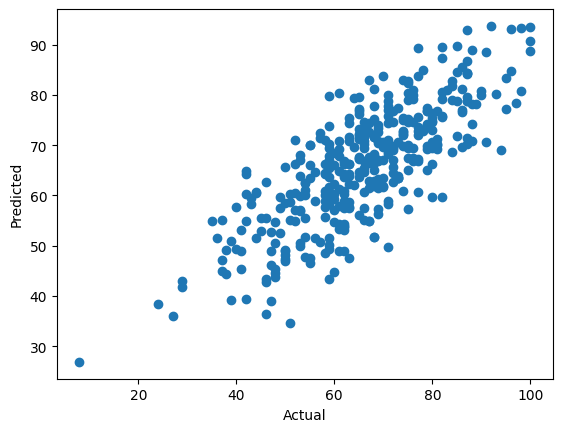

In [45]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

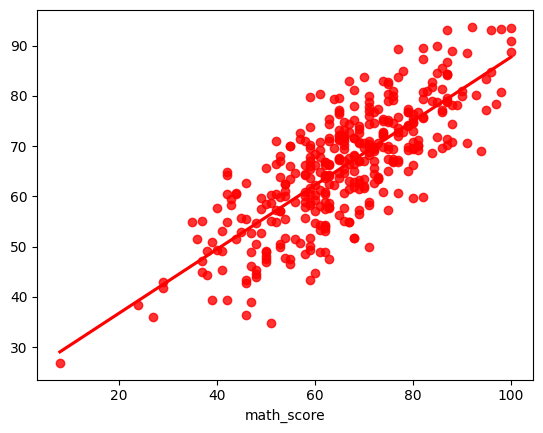

In [46]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [47]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1424,75,80.356623,-5.356623
111,88,70.760686,17.239314
1850,69,62.701494,6.298506
968,66,66.934484,-0.934484
415,47,46.178438,0.821562
...,...,...,...
1221,51,60.290002,-9.290002
1837,53,57.046195,-4.046195
733,58,71.075422,-13.075422
584,88,74.292023,13.707977
